In [2]:
import pandas as pd

In [3]:
# Load files into a pandas dataframe
train_values = pd.read_csv('./train_values.csv')
train_labels = pd.read_csv('./train_labels.csv')
test_values = pd.read_csv('./test_values.csv')
submission_format = pd.read_csv('../submission_format (1).csv')

In [4]:
merged_train = pd.merge(train_values, train_labels, on='building_id')

In [5]:
# Combining trained values with test values
combined_data = pd.concat([merged_train, test_values], ignore_index=True)
combined_data

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3.0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2.0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3.0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2.0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347464,310028,4,605,3623,3,70,20,6,t,r,...,0,0,0,0,0,0,0,0,0,NaN
347465,663567,10,1407,11907,3,25,6,7,n,r,...,0,0,0,0,0,0,0,0,0,NaN
347466,1049160,22,1136,7712,1,50,3,3,t,r,...,0,0,0,0,0,0,0,0,0,NaN
347467,442785,6,1041,912,2,5,9,5,t,r,...,0,0,0,0,0,0,0,0,0,NaN


# Data Exploration and Cleaning

In [6]:
print(combined_data.head())
combined_data.dtypes

   building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       802906               6             487           12198   
1        28830               8             900            2812   
2        94947              21             363            8973   
3       590882              22             418           10694   
4       201944              11             131            1488   

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0                    2   30                6                  5   
1                    2   10                8                  7   
2                    2   10                5                  5   
3                    2   10                6                  5   
4                    3   30                8                  9   

  land_surface_condition foundation_type  ... has_secondary_use_hotel  \
0                      t               r  ...                       0   
1                      o               r  ...         

building_id                                 int64
geo_level_1_id                              int64
geo_level_2_id                              int64
geo_level_3_id                              int64
count_floors_pre_eq                         int64
age                                         int64
area_percentage                             int64
height_percentage                           int64
land_surface_condition                     object
foundation_type                            object
roof_type                                  object
ground_floor_type                          object
other_floor_type                           object
position                                   object
plan_configuration                         object
has_superstructure_adobe_mud                int64
has_superstructure_mud_mortar_stone         int64
has_superstructure_stone_flag               int64
has_superstructure_cement_mortar_stone      int64
has_superstructure_mud_mortar_brick         int64


In [7]:
combined_data[['building_id','damage_grade']]
# test_values.columns

,building_id,damage_grade
0,802906,3.0
1,28830,2.0
2,94947,3.0
3,590882,2.0
4,201944,3.0
...,...,...
347464,310028,NaN
347465,663567,NaN
347466,1049160,NaN
347467,442785,NaN


In [8]:
combined_data.isna().sum()

building_id                                   0
geo_level_1_id                                0
geo_level_2_id                                0
geo_level_3_id                                0
count_floors_pre_eq                           0
age                                           0
area_percentage                               0
height_percentage                             0
land_surface_condition                        0
foundation_type                               0
roof_type                                     0
ground_floor_type                             0
other_floor_type                              0
position                                      0
plan_configuration                            0
has_superstructure_adobe_mud                  0
has_superstructure_mud_mortar_stone           0
has_superstructure_stone_flag                 0
has_superstructure_cement_mortar_stone        0
has_superstructure_mud_mortar_brick           0
has_superstructure_cement_mortar_brick  

In [9]:
# Check for duplicates
duplicates = combined_data.duplicated()
print(duplicates.sum())

0


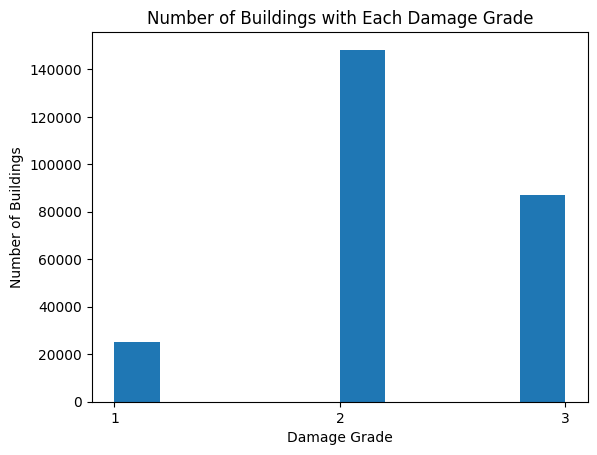

In [10]:
# Visualizing most damaged levels
import matplotlib.pyplot as plt

damage = combined_data['damage_grade']

plt.hist(damage)
plt.title('Number of Buildings with Each Damage Grade')
plt.xlabel('Damage Grade')
plt.xticks([1,2,3],['1','2','3'])
plt.ylabel('Number of Buildings')

plt.show()

In [11]:
print('It appears most buildings experienced level 2 damage')

It appears most buildings experienced level 2 damage


In [12]:
# Trying to see which features are objects
combined_data.select_dtypes(include=['object'])

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
0,t,r,n,f,q,t,d,v
1,o,r,n,x,q,s,d,v
2,t,r,n,f,x,t,d,v
3,t,r,n,f,x,s,d,v
4,t,r,n,f,x,s,d,v
...,...,...,...,...,...,...,...,...
347464,t,r,q,f,q,t,d,w
347465,n,r,n,f,q,s,d,v
347466,t,r,n,f,j,s,d,v
347467,t,r,n,f,q,s,d,a


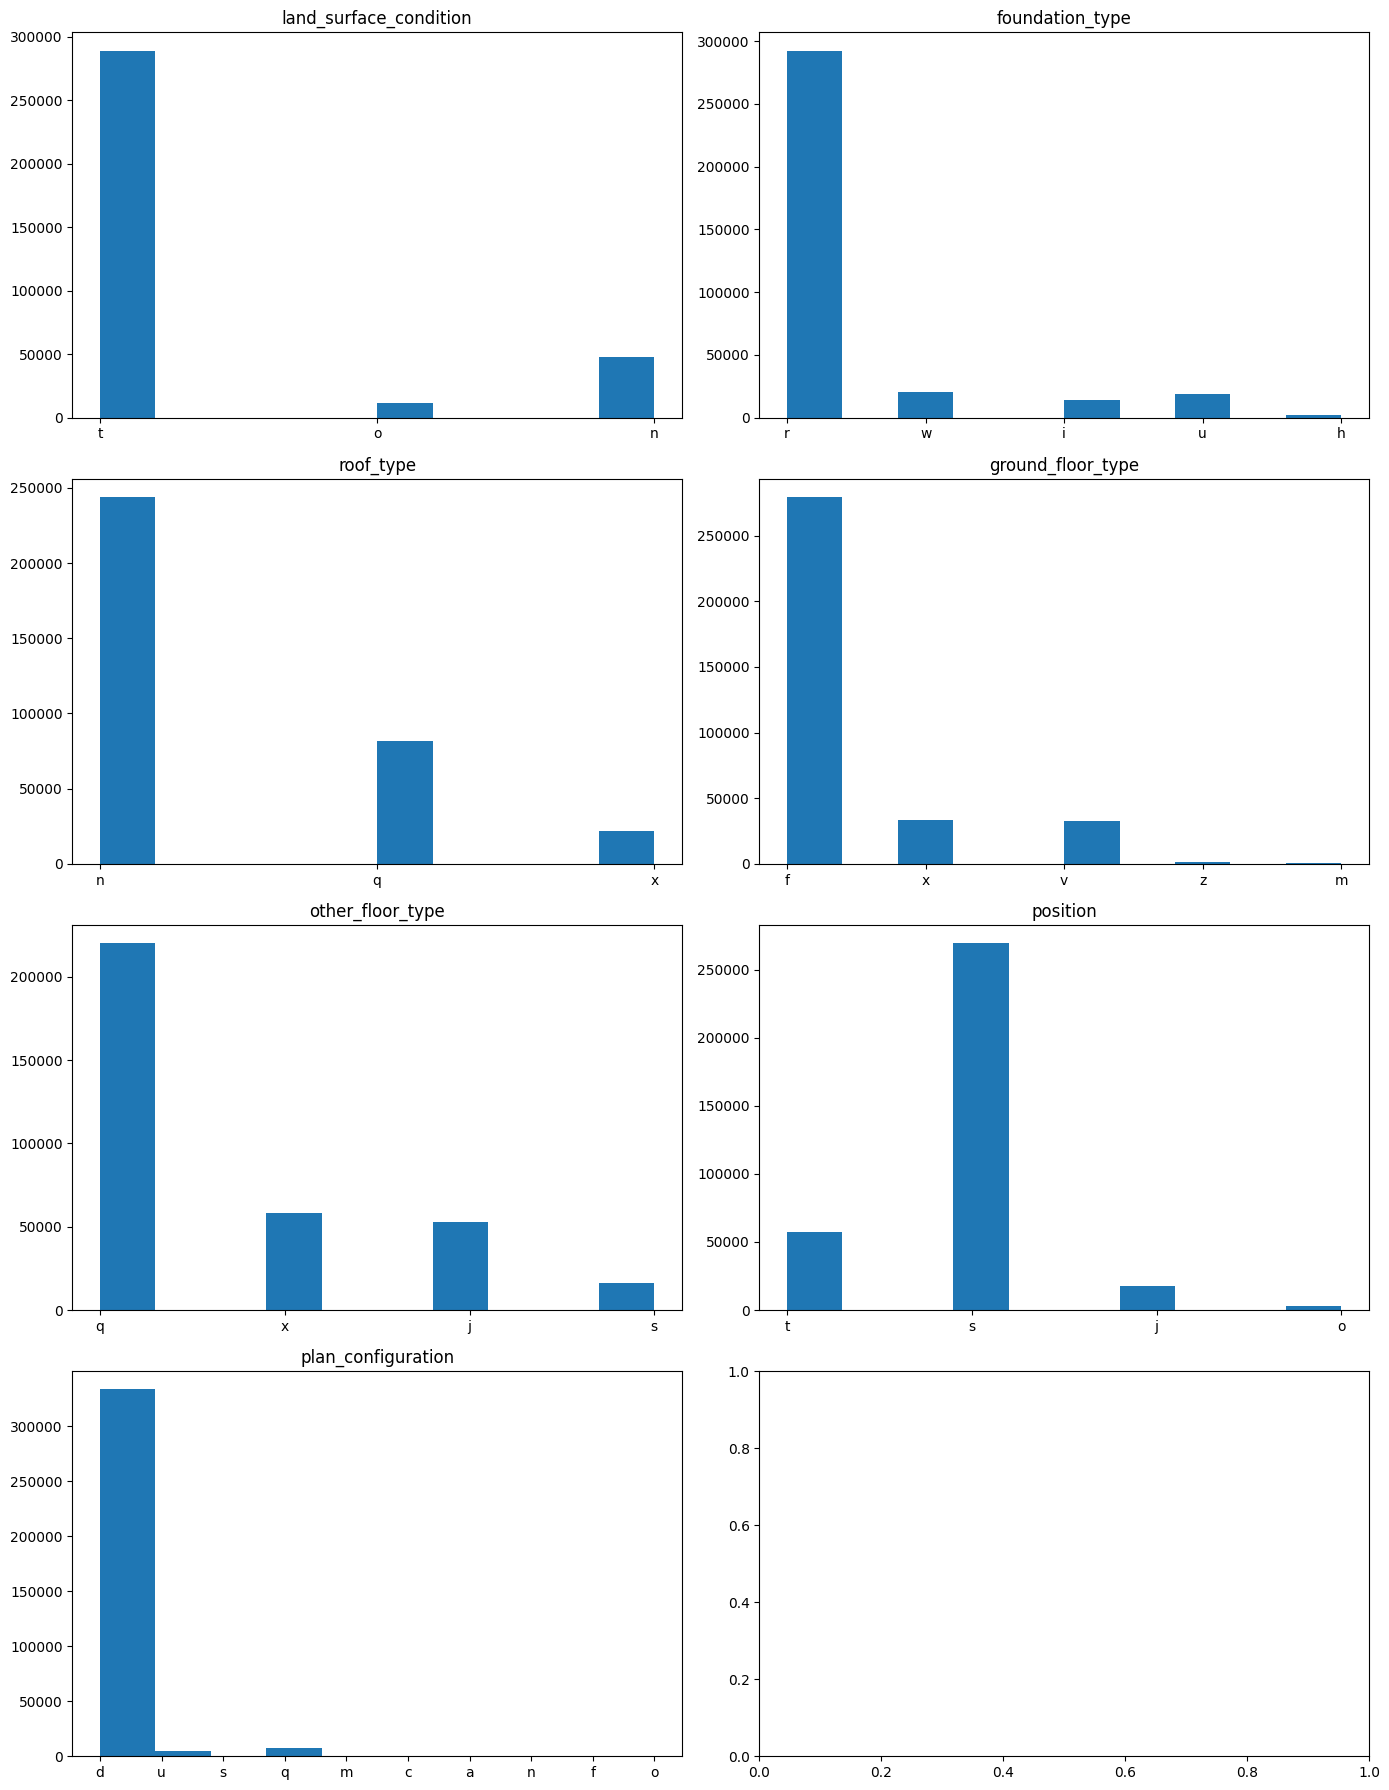

In [13]:
import matplotlib.pyplot as plt

# Creating a figure and axis for each variable
fig, axs = plt.subplots(4, 2, figsize=(14, 18))  # 4 rows, 2 columns

# Flatten the axis array for easier iteration
axs = axs.flatten()

# Plotting each variable as a histogram
variables = ['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type',
             'other_floor_type', 'position', 'plan_configuration']

for i, var in enumerate(variables):
    axs[i].hist(combined_data[var])
    axs[i].set_title(var)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [14]:
print('Since there are ascii variables, histograms were used to see which variable category appeared most frequently')

Since there are ascii variables, histograms were used to see which variable category appeared most frequently


# Preprocessing Data

First, we need to hot_encode the variables; including the ascii ones

In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# Example dataset X with categorical variables
# Assuming merged_train is your DataFrame containing these variables

# Initialize label encoder and one-hot encoder
label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False to get a non-sparse matrix

# Create a copy of the DataFrame to avoid modifying the original DataFrame within the loop
combined_data_encoded = combined_data.copy()
combined_data_encoded = combined_data_encoded.drop(columns=['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id'])

# Iterate over each categorical variable and apply encoding
for column in combined_data.columns:
    if combined_data[column].dtype == 'object':  # Check if the column is categorical
        # Use label encoding
        combined_data_encoded[column + '_label_encoded'] = label_encoder.fit_transform(combined_data[column])

        # Use one-hot encoding
        one_hot_encoded_array = one_hot_encoder.fit_transform(combined_data_encoded[[column]])
        one_hot_encoded_df = pd.DataFrame(one_hot_encoded_array, columns=[f"{column}_{int(i)}" for i in range(one_hot_encoded_array.shape[1])])
        combined_data_encoded = pd.concat([combined_data_encoded, one_hot_encoded_df], axis=1)

        # Drop the original categorical column and the label encoded column
        combined_data_encoded.drop([column, column + '_label_encoded'], axis=1, inplace=True)

# Now merged_train_encoded should have all categorical variables replaced with one-hot encoded columns
combined_data2 = combined_data_encoded

In [16]:
# Adding back columns
columns_to_add_back = combined_data[['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id']]

# Concatenate the extracted columns to the front of merged_train
combined_data = pd.concat([columns_to_add_back, combined_data_encoded], axis=1)

# Cleaned Data
combined_data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,plan_configuration_4,plan_configuration_5,plan_configuration_6,plan_configuration_7,plan_configuration_8,plan_configuration_9,legal_ownership_status_0,legal_ownership_status_1,legal_ownership_status_2,legal_ownership_status_3
0,802906,6,487,12198,2,30,6,5,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,28830,8,900,2812,2,10,8,7,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,94947,21,363,8973,2,10,5,5,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,590882,22,418,10694,2,10,6,5,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,201944,11,131,1488,3,30,8,9,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
# Creating a new feature
combined_data['volume'] = combined_data['area_percentage'] * combined_data['height_percentage']

combined_data['damage_grade']

0         3.0
1         2.0
2         3.0
3         2.0
4         3.0
         ... 
347464    NaN
347465    NaN
347466    NaN
347467    NaN
347468    NaN
Name: damage_grade, Length: 347469, dtype: float64

Using ensemble methods for optimal feature selection

# Train/Test Split 

In [18]:

# Split the data into training and testing sets
train_data = combined_data[combined_data['damage_grade'].notnull()]
test_data = combined_data[combined_data['damage_grade'].isnull()]

In [19]:
# Training the model, using Train_data. Will use Test Data to find damage_grade after 

import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Ensure 'damage_grade' is treated as categorical
train_data['damage_grade']= train_data['damage_grade'].astype(int).astype('category')

# Training set
X = train_data.drop(columns=['damage_grade'])
y = train_data['damage_grade']



/var/folders/93/r_nbn0pj2jb1d097mhf6q5ww0000gn/T/ipykernel_8924/3175756518.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['damage_grade']= train_data['damage_grade'].astype(int).astype('category')


In [20]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Assuming X and y are your features and target variables
# Use a smaller sample for initial feature selection
sample_size = 5000  # Adjust the sample size as needed
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=sample_size, stratify=y, random_state=42)

# USING RFECV TO FIND BEST FEATURES
def perform_rfecv(estimator, X_sample, y_sample,step=0.2, cv_folds=3):
    # Initialize RFECV
    rfecv = RFECV(estimator=estimator, step=1, cv=StratifiedKFold(cv_folds), scoring='f1_micro', n_jobs=-1)
    
    # Fit RFECV on the sample
    rfecv.fit(X_sample, y_sample)

    # Get the optimal number of features
    optimal_num_features = rfecv.n_features_
    print(f"Optimal number of features: {optimal_num_features}")

    # Get the feature rankings
    feature_ranking = pd.DataFrame({
        'Feature': X_sample.columns,
        'Ranking': rfecv.ranking_
    }).sort_values(by='Ranking')

    # Get the selected features
    selected_features = feature_ranking[feature_ranking['Ranking'] == 1]['Feature'].tolist()
    print(f"Selected features: {selected_features}")

    # Print the rankings of all features
    print(feature_ranking)

    # Return selected features, feature ranking, and the RFECV object
    return selected_features, rfecv.ranking_, rfecv

# RandomForest (Bagging)
print("RandomForest Feature Selection (Bagging)")
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
selected_features_rf, feature_ranking_rf, rfecv_rf = perform_rfecv(rf, X_sample, y_sample, cv_folds=3)

# GradientBoosting (Boosting)
print("GradientBoosting Feature Selection (Boosting)")
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
selected_features_gb, feature_ranking_gb, rfecv_gb = perform_rfecv(gb, X_sample, y_sample, cv_folds=3)

# Cross-validation for RandomForest with selected features
print("Cross-validation for RandomForest with selected features")
X_selected_rf = X.loc[:, selected_features_rf]
cross_val_scores_rf = cross_val_score(rf, X_selected_rf, y, cv=StratifiedKFold(5), scoring='f1_micro', n_jobs=-1)
print(f"RandomForest cross-validation accuracy: {cross_val_scores_rf.mean()}")

# Cross-validation for GradientBoosting with selected features
print("Cross-validation for GradientBoosting with selected features")
X_selected_gb = X.loc[:, selected_features_gb]
cross_val_scores_gb = cross_val_score(gb, X_selected_gb, y, cv=StratifiedKFold(5), scoring='f1_micro', n_jobs=-1)
print(f"GradientBoosting cross-validation accuracy: {cross_val_scores_gb.mean()}")


RandomForest Feature Selection (Bagging)
Optimal number of features: 37
Selected features: ['building_id', 'land_surface_condition_2', 'foundation_type_2', 'foundation_type_3', 'foundation_type_4', 'roof_type_0', 'roof_type_1', 'roof_type_2', 'ground_floor_type_0', 'ground_floor_type_2', 'ground_floor_type_3', 'other_floor_type_0', 'other_floor_type_1', 'other_floor_type_3', 'position_2', 'position_3', 'plan_configuration_2', 'legal_ownership_status_2', 'land_surface_condition_0', 'has_secondary_use_agriculture', 'volume', 'count_families', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'has_secondary_use', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_adobe_mud']
                          Feature  Ranking
0                     

In [43]:
# These are the best featurEs now 
X_selected_rf.columns

Index(['building_id', 'land_surface_condition_2', 'foundation_type_2',
       'foundation_type_3', 'foundation_type_4', 'roof_type_0', 'roof_type_1',
       'roof_type_2', 'ground_floor_type_0', 'ground_floor_type_2',
       'ground_floor_type_3', 'other_floor_type_0', 'other_floor_type_1',
       'other_floor_type_3', 'position_2', 'position_3',
       'plan_configuration_2', 'legal_ownership_status_2',
       'land_surface_condition_0', 'has_secondary_use_agriculture', 'volume',
       'count_families', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_secondary_use', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag', 'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_adobe_mud'],
      dtype='object')

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score

# Create a RandomForest model with reduced complexity
rf_reduced = RandomForestClassifier(
    n_estimators=50,         # Reduce the number of trees
    max_depth=12,            # Limit the depth of trees
    max_features='sqrt',     # Consider a smaller subset of features
    random_state=42
)

# Fit the model with the training data
rf_reduced.fit(X_selected_rf, y)

# Predict and evaluate the model
y_train_pred_rf_reduced = rf_reduced.predict(X_selected_rf)
print("Reduced Complexity Train Set Accuracy:", accuracy_score(y, y_train_pred_rf_reduced))

# Cross-validation
cross_val_scores_rf_reduced = cross_val_score(rf_reduced, X_selected_rf, y, cv=StratifiedKFold(5), scoring='f1_micro', n_jobs=-1)
print(f"Cross-validation accuracy with reduced complexity: {cross_val_scores_rf_reduced.mean()}")


Reduced Complexity Train Set Accuracy: 0.6889382619406679
Cross-validation accuracy with reduced complexity: 0.6688270594386876


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss

# Create a RandomForest model with reduced complexity
rf_reduced = RandomForestClassifier(
    n_estimators=30,         # Reduce the number of trees further
    max_depth=7,             # Limit the depth of trees more
    max_features='sqrt',     # Consider a smaller subset of features
    min_samples_split=10,    # Minimum samples required to split an internal node
    min_samples_leaf=5,      # Minimum samples required at a leaf node
    random_state=42
)

# Fit the model with the training data
rf_reduced.fit(X_selected_rf, y)

# Predict and evaluate the model
y_train_pred_rf_reduced = rf_reduced.predict(X_selected_rf)
print("Reduced Complexity Train Set Accuracy:", accuracy_score(y, y_train_pred_rf_reduced))

# Cross-validation
cross_val_scores_rf_reduced = cross_val_score(rf_reduced, X_selected_rf, y, cv=StratifiedKFold(5), scoring='f1_micro', n_jobs=-1)
print(f"Cross-validation accuracy with reduced complexity: {cross_val_scores_rf_reduced.mean()}")

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_selected_rf, y, test_size=0.2, stratify=y, random_state=42)

# Predictions for the test set
y_test_pred_rf_reduced = rf_reduced.predict(X_test)
y_pred_prob_reduced = rf_reduced.predict_proba(X_test)

# Evaluation
print("Test Set Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_rf_reduced))

print("Test Set Classification Report:")
print(classification_report(y_test, y_test_pred_rf_reduced))

test_accuracy = accuracy_score(y_test, y_test_pred_rf_reduced)
print("Test Set Accuracy:", test_accuracy)

# Calculate and print AIC
def AIC_score(y_true, y_pred_prob, df):
    ll = log_loss(y_true, y_pred_prob)
    n = len(y_true)
    aic = 2 * df - 2 * (-n * ll)
    return aic

aic_value_reduced = AIC_score(y_test, y_pred_prob_reduced, df=X_test.shape[1] + 1)
print('AIC with Reduced Complexity:', aic_value_reduced)


Reduced Complexity Train Set Accuracy: 0.6238118809981542
Cross-validation accuracy with reduced complexity: 0.6288463954594821
Test Set Confusion Matrix:
[[ 1396  3622     7]
 [  671 28137   844]
 [   28 14384  3032]]
Test Set Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.28      0.39      5025
           2       0.61      0.95      0.74     29652
           3       0.78      0.17      0.28     17444

    accuracy                           0.62     52121
   macro avg       0.69      0.47      0.47     52121
weighted avg       0.67      0.62      0.56     52121

Test Set Accuracy: 0.6247961474261814
AIC with Reduced Complexity: 79745.34191203746


In [33]:
X_selected_rf.columns

Index(['building_id', 'land_surface_condition_2', 'foundation_type_2',
       'foundation_type_3', 'foundation_type_4', 'roof_type_0', 'roof_type_1',
       'roof_type_2', 'ground_floor_type_0', 'ground_floor_type_2',
       'ground_floor_type_3', 'other_floor_type_0', 'other_floor_type_1',
       'other_floor_type_3', 'position_2', 'position_3',
       'plan_configuration_2', 'legal_ownership_status_2',
       'land_surface_condition_0', 'has_secondary_use_agriculture', 'volume',
       'count_families', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_secondary_use', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag', 'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_adobe_mud'],
      dtype='object')

In [23]:

# Select the same columns in test_data as in X_selected_rf using .loc
test_data_selected = test_data.loc[:, X_selected_rf.columns]

# Append the damage_grade column to the end using .loc
test_data_selected.loc[:, 'damage_grade'] = test_data['damage_grade']

# Verify the columns
# print(test_data_selected.columns)


# test_data_selected.head()
X_selected_rf.head()


,building_id,land_surface_condition_2,foundation_type_2,foundation_type_3,foundation_type_4,roof_type_0,roof_type_1,roof_type_2,ground_floor_type_0,ground_floor_type_2,...,area_percentage,height_percentage,has_secondary_use,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_adobe_mud
0,802906,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,6,5,0,1,0,0,0,0,0,1
1,28830,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,8,7,0,1,0,0,0,0,0,0
2,94947,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,5,5,0,1,0,0,0,0,0,0
3,590882,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,6,5,0,1,0,0,0,1,1,0
4,201944,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,8,9,0,0,0,0,0,0,0,1


In [26]:
# Train the RandomForest model using the selected features from the training set

# Best Features with y target 
X_selected_rf
y = train_data['damage_grade']

best_random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
best_random_forest.fit(X_selected_rf, y)

# Predict the labels for the testing data
y_test_pred_rf = best_random_forest.predict(X_selected_rf)


In [27]:
# y_test.shape
y_test_pred_rf

array([3, 2, 3, ..., 3, 2, 3])

In [28]:
# Remove the target column from the test set
test_data_features_only = test_data[X_selected_rf.columns]

# Predict the labels for the test set using the trained model
y_test_pred = best_random_forest.predict(test_data_features_only)

# Output the predictions
print(y_test_pred)


[2 2 2 ... 3 2 1]


In [31]:
# Assuming y_test_pred contains the predictions
y_test_pred_series = pd.Series(y_test_pred)

# Count occurrences of each predicted class
predictions_counts = y_test_pred_series.value_counts()

# Print the counts
print(predictions_counts)

2    57517
3    23494
1     5857
Name: count, dtype: int64


In [32]:
# Save predictions to a CSV file
y_pred = y_test_pred  # Predictions
building_ids = test_data.building_id  # Assuming you have a column `building_id` in your test_data

# Create DataFrame with building_id and predicted values
predictions_df = pd.DataFrame({
    'building_id': building_ids,
    'damage_grade': y_pred
})

# Save the DataFrame to a CSV file
predictions_df.to_csv('predictions_rf.csv', index=False)

print('Predictions saved to predictions.csv')

Predictions saved to predictions.csv


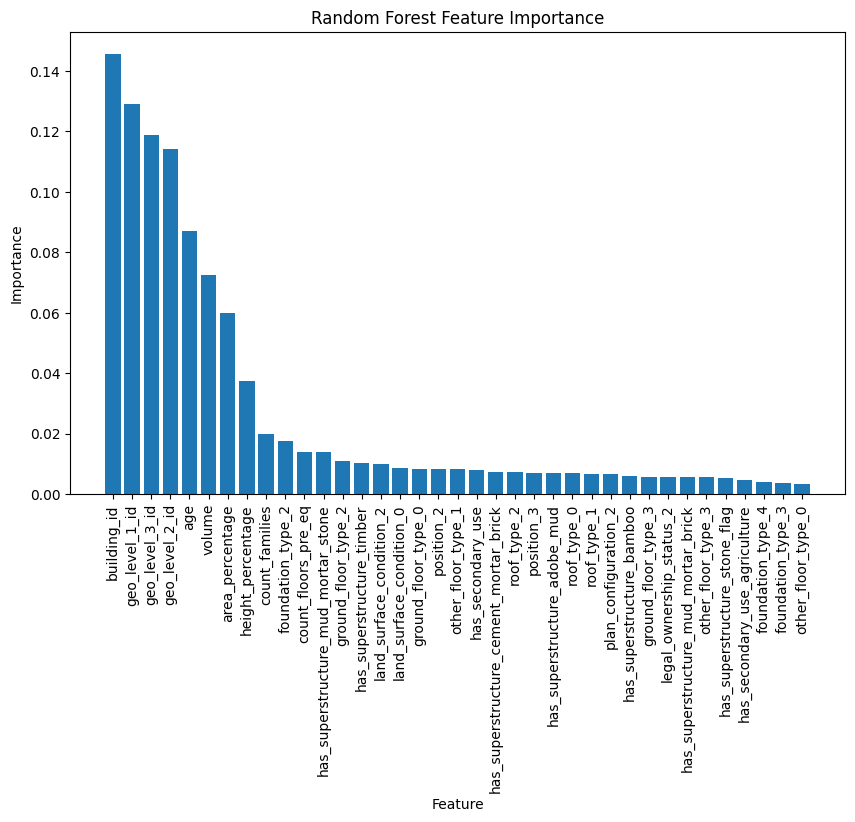

In [37]:
import matplotlib.pyplot as plt

# Get the feature importances
importances = best_random_forest.feature_importances_

# Get the names of the features
feature_names = X_selected_rf.columns

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.show()